In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/Brain Dead'

'Brain Dead IPL.ipynb'	 deliveries.csv   matches.csv


## **Data Cleaning and Feature Engineering**

### **Import Required Libraries and Load Dataset**

In [ ]:
import pandas as pd
import numpy as np

# Load datasets
matches = pd.read_csv('/content/drive/MyDrive/Brain Dead/matches.csv')
deliveries = pd.read_csv('/content/drive/MyDrive/Brain Dead/deliveries.csv')

# Quick look
matches.head()
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization style
sns.set(style="whitegrid")

### **Handle Missing Values**

In [ ]:
# Check missing values in both datasets
print("Matches missing values:\n", matches.isnull().sum())
print("\nDeliveries missing values:\n", deliveries.isnull().sum())

Matches missing values:
 id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

Deliveries missing values:
 match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             2

In [ ]:
# Fill missing player_of_match with 'No Award'
matches['player_of_match'].fillna('No Award', inplace=True)

# Fill result_margin with 0 (as no margin if no result/tie)
matches['result_margin'].fillna(0, inplace=True)

# Fill target_runs and target_overs with 0 if missing (no target probably means NR)
matches['target_runs'].fillna(0, inplace=True)
matches['target_overs'].fillna(0, inplace=True)

# Fill method with 'Normal' if DLS method was not applied
matches['method'].fillna('Normal', inplace=True)


<ipython-input-25-49e457276700>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['player_of_match'].fillna('No Award', inplace=True)
<ipython-input-25-49e457276700>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
# Fill extras_type missing values with 'None'
deliveries['extras_type'].fillna('None', inplace=True)

# Fill player_dismissed, dismissal_kind, and fielder with 'None'
deliveries['player_dismissed'].fillna('None', inplace=True)
deliveries['dismissal_kind'].fillna('None', inplace=True)
deliveries['fielder'].fillna('None', inplace=True)


<ipython-input-26-e1eae84391ee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deliveries['extras_type'].fillna('None', inplace=True)
<ipython-input-26-e1eae84391ee>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
print(" Matches Dataset - Missing Values:\n")
print(matches.isnull().sum())

print("\n Deliveries Dataset - Missing Values:\n")
print(deliveries.isnull().sum())


 Matches Dataset - Missing Values:

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

 Deliveries Dataset - Missing Values:

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [ ]:
# Checking for extreme values in deliveries
deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


# **Exploratory Data Analysis (EDA): Team Performance Analysis**

### **Matches Played by Teams**

<ipython-input-32-7a74f3f118c8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=matches_played_count, x='Team', y='Matches Played', palette='viridis')


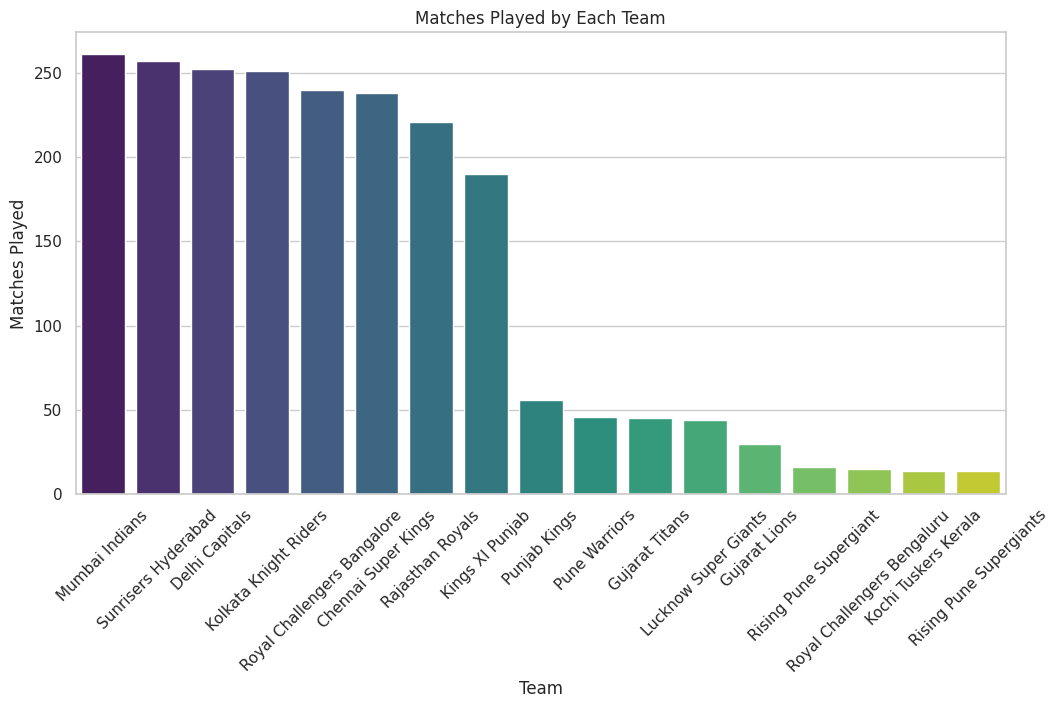

In [ ]:
# Matches Played
matches_played = pd.concat([matches['team1'], matches['team2']])
matches_played_count = matches_played.value_counts().reset_index()
matches_played_count.columns = ['Team', 'Matches Played']

plt.figure(figsize=(12,6))
sns.barplot(data=matches_played_count, x='Team', y='Matches Played', palette='viridis')
plt.title("Matches Played by Each Team")
plt.xticks(rotation=45)
plt.show()

### **Matches Won & Win Percentage**

<ipython-input-33-39af1ba7337e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats, x='Team', y='Win Percentage', palette='coolwarm')


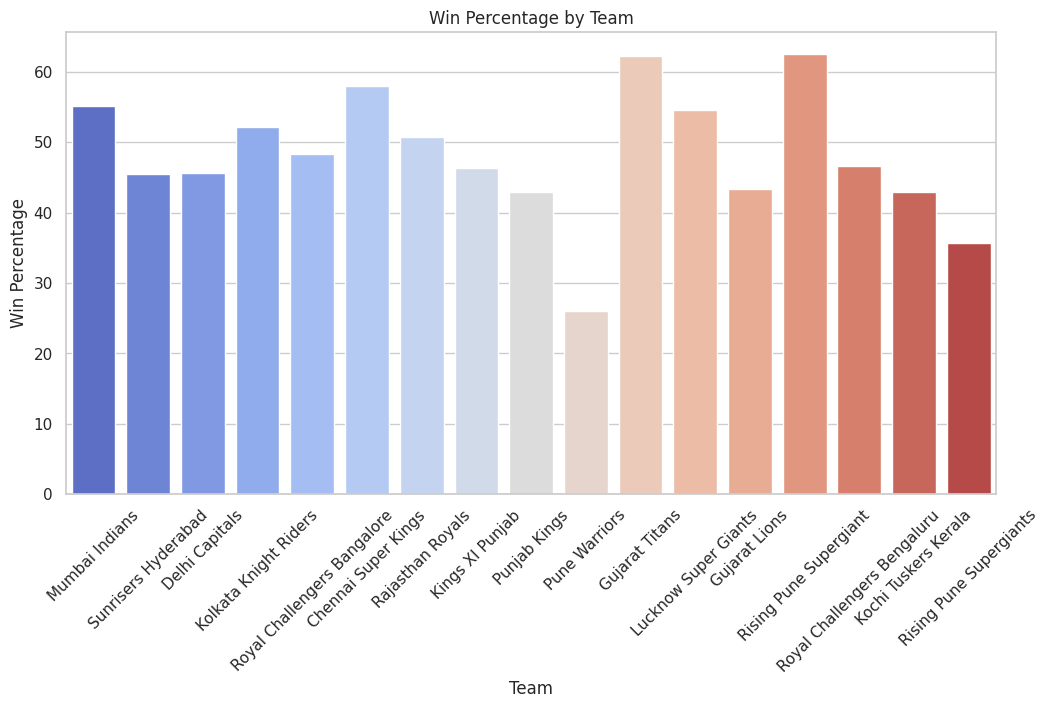

In [ ]:
# Matches Won
wins = matches['winner'].value_counts().reset_index()
wins.columns = ['Team', 'Wins']

# Combine and calculate Win %
team_stats = pd.merge(matches_played_count, wins, on='Team')
team_stats['Win Percentage'] = (team_stats['Wins'] / team_stats['Matches Played']) * 100

plt.figure(figsize=(12,6))
sns.barplot(data=team_stats, x='Team', y='Win Percentage', palette='coolwarm')
plt.title("Win Percentage by Team")
plt.xticks(rotation=45)
plt.show()


### **Run Rate (Batting side)**

<ipython-input-34-7f16dc39c3ee>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=run_rate, x='Team', y='Run Rate', palette='crest')


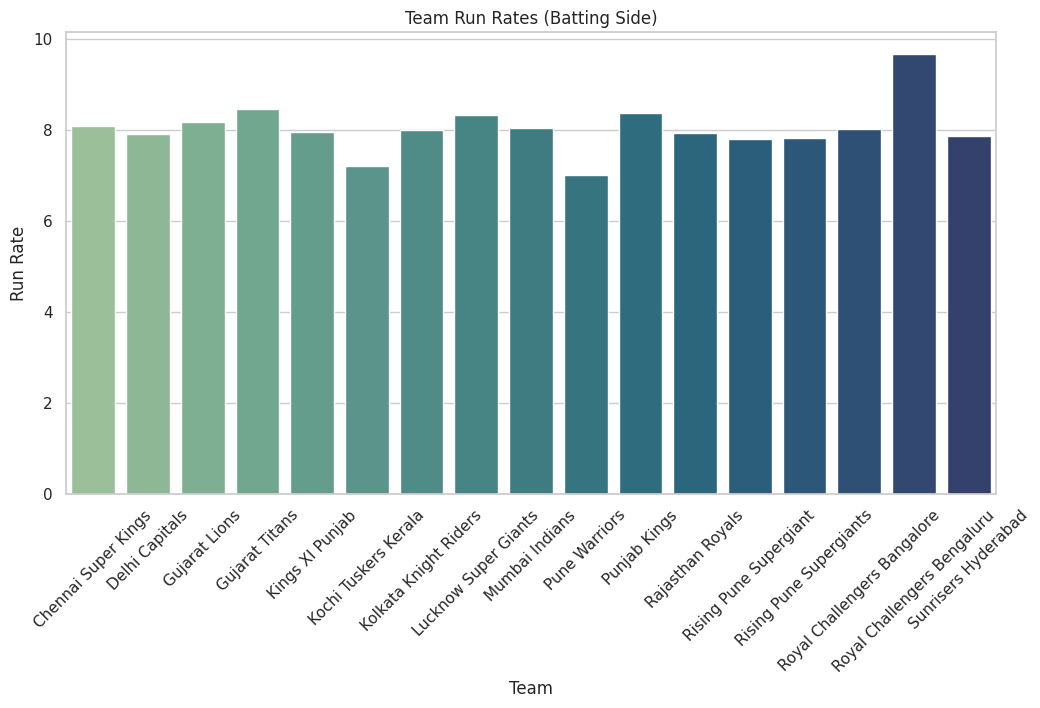

In [ ]:
# Total Runs and Balls Faced
team_runs = deliveries.groupby('batting_team')['total_runs'].sum()
team_balls = deliveries.groupby('batting_team').size()

# Run Rate = Total Runs / Total Overs
run_rate = (team_runs / team_balls) * 6
run_rate = run_rate.reset_index()
run_rate.columns = ['Team', 'Run Rate']

plt.figure(figsize=(12,6))
sns.barplot(data=run_rate, x='Team', y='Run Rate', palette='crest')
plt.title("Team Run Rates (Batting Side)")
plt.xticks(rotation=45)
plt.show()


### **Economy Rate (Bowling side)**

<ipython-input-35-c575ada49a6c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=economy_rate, x='Team', y='Economy Rate', palette='mako')


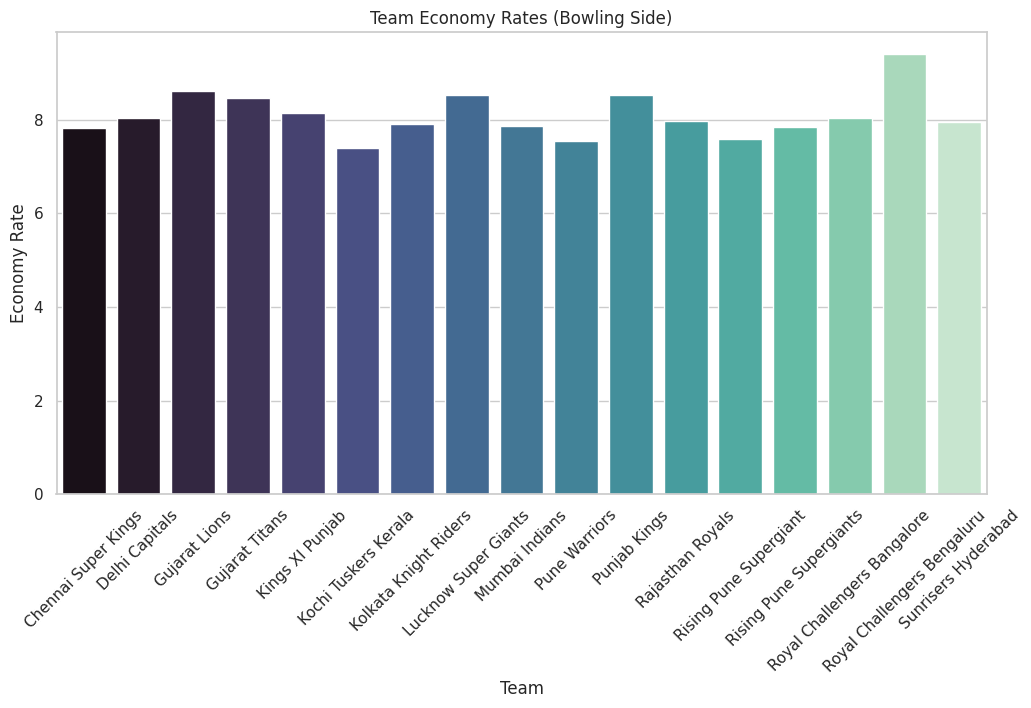

In [ ]:
# Total Runs Conceded and Balls Bowled
bowling_runs = deliveries.groupby('bowling_team')['total_runs'].sum()
bowling_balls = deliveries.groupby('bowling_team').size()

# Economy Rate = Total Runs Conceded / Total Overs
economy_rate = (bowling_runs / bowling_balls) * 6
economy_rate = economy_rate.reset_index()
economy_rate.columns = ['Team', 'Economy Rate']

plt.figure(figsize=(12,6))
sns.barplot(data=economy_rate, x='Team', y='Economy Rate', palette='mako')
plt.title("Team Economy Rates (Bowling Side)")
plt.xticks(rotation=45)
plt.show()


### **Highest & Lowest Inning Scores**

<ipython-input-36-5202ad795461>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=highest_scores, x='Team', y='Highest Score', palette='plasma')


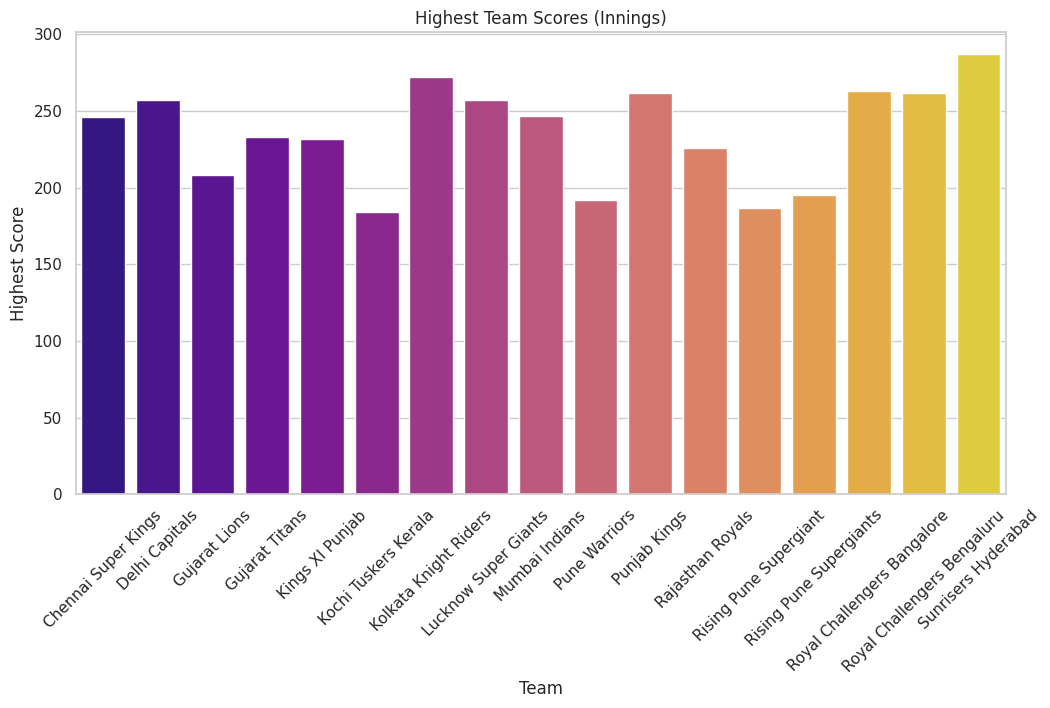

<ipython-input-36-5202ad795461>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_scores, x='Team', y='Lowest Score', palette='Reds')


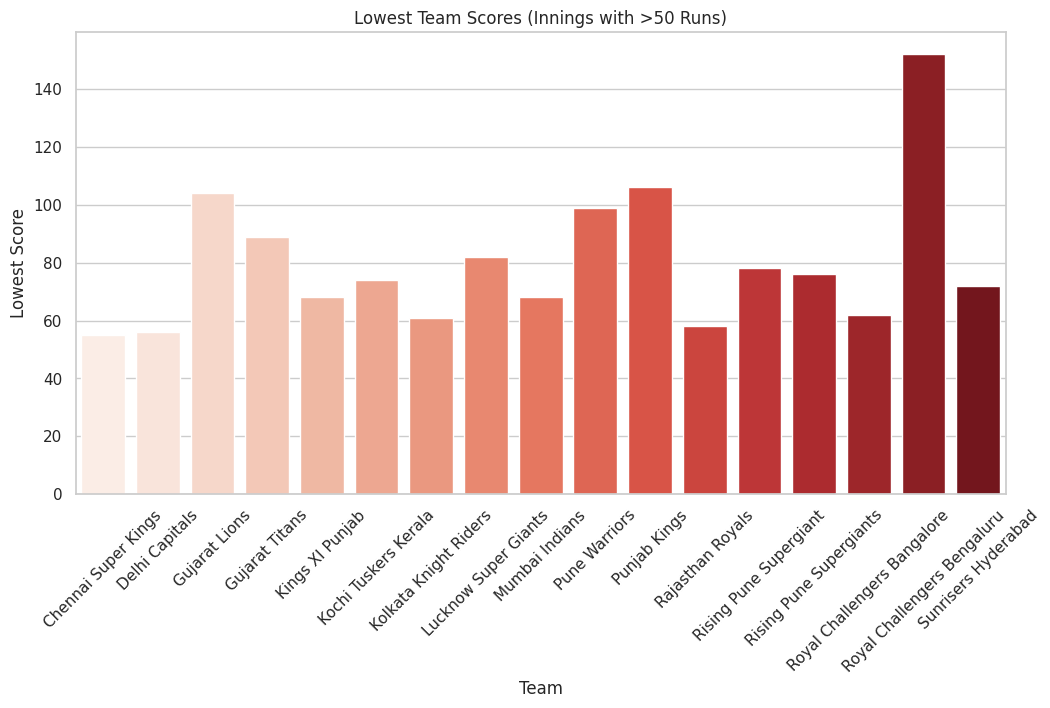

In [ ]:
# Total Runs Per Inning
inning_scores = deliveries.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()

# Highest Scores
highest_scores = inning_scores.groupby('batting_team')['total_runs'].max().reset_index()
highest_scores.columns = ['Team', 'Highest Score']

plt.figure(figsize=(12,6))
sns.barplot(data=highest_scores, x='Team', y='Highest Score', palette='plasma')
plt.title("Highest Team Scores (Innings)")
plt.xticks(rotation=45)
plt.show()

# Lowest Scores (Optional): If you want innings with minimum runs (say innings with >=20 overs)
lowest_scores = inning_scores[inning_scores['total_runs'] > 50].groupby('batting_team')['total_runs'].min().reset_index()
lowest_scores.columns = ['Team', 'Lowest Score']

plt.figure(figsize=(12,6))
sns.barplot(data=lowest_scores, x='Team', y='Lowest Score', palette='Reds')
plt.title("Lowest Team Scores (Innings with >50 Runs)")
plt.xticks(rotation=45)
plt.show()


### **Total 4s and 6s**

<ipython-input-37-282cf59ac9aa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=boundaries, x='Team', y='Total 4s', palette='Blues')


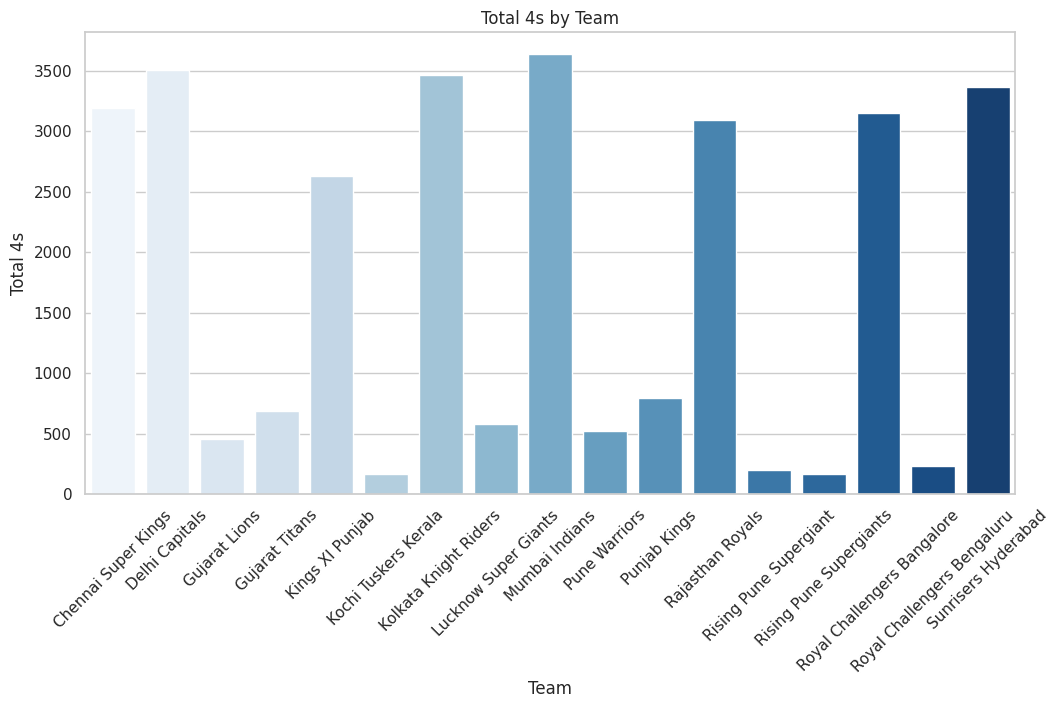

<ipython-input-37-282cf59ac9aa>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=boundaries, x='Team', y='Total 6s', palette='Oranges')


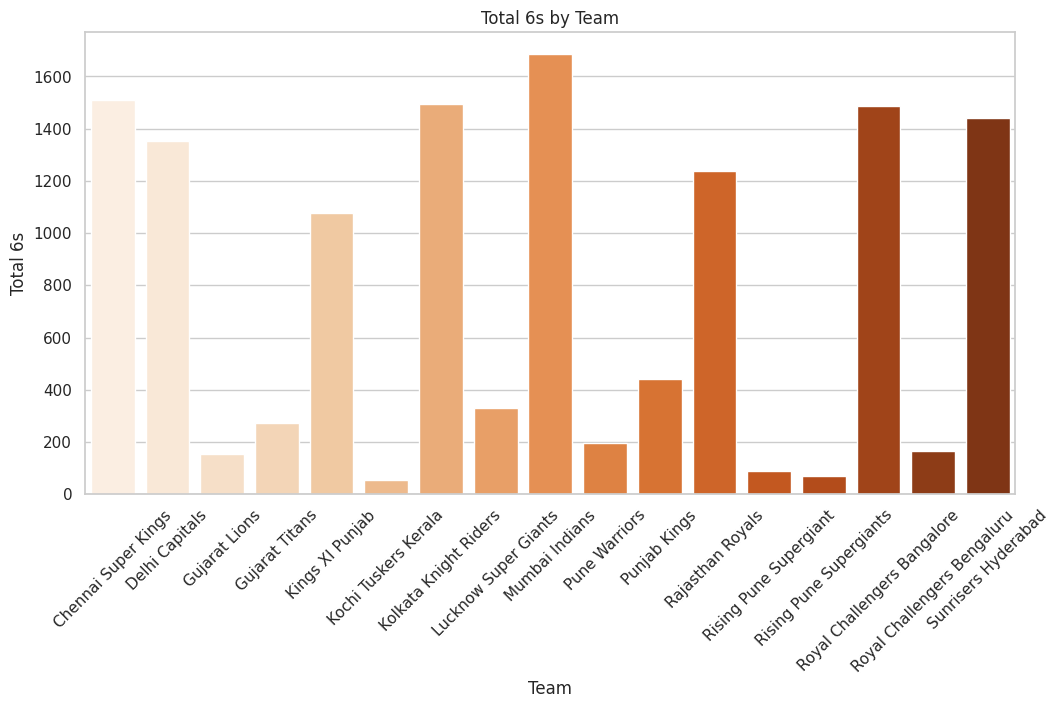

In [ ]:
# Filter deliveries where runs from batsman are 4 or 6
fours = deliveries[deliveries['batsman_runs'] == 4].groupby('batting_team').size().reset_index(name='Total 4s')
sixes = deliveries[deliveries['batsman_runs'] == 6].groupby('batting_team').size().reset_index(name='Total 6s')

# Merge
boundaries = pd.merge(fours, sixes, on='batting_team')
boundaries.columns = ['Team', 'Total 4s', 'Total 6s']

# Plot 4s
plt.figure(figsize=(12,6))
sns.barplot(data=boundaries, x='Team', y='Total 4s', palette='Blues')
plt.title("Total 4s by Team")
plt.xticks(rotation=45)
plt.show()

# Plot 6s
plt.figure(figsize=(12,6))
sns.barplot(data=boundaries, x='Team', y='Total 6s', palette='Oranges')
plt.title("Total 6s by Team")
plt.xticks(rotation=45)
plt.show()


### **Average Runs in Powerplay (1-6 overs) and Death Overs (16-20 overs)**

<ipython-input-38-ac76e7735fa7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pp_avg, x='batting_team', y='Avg Powerplay Runs', palette='Purples')


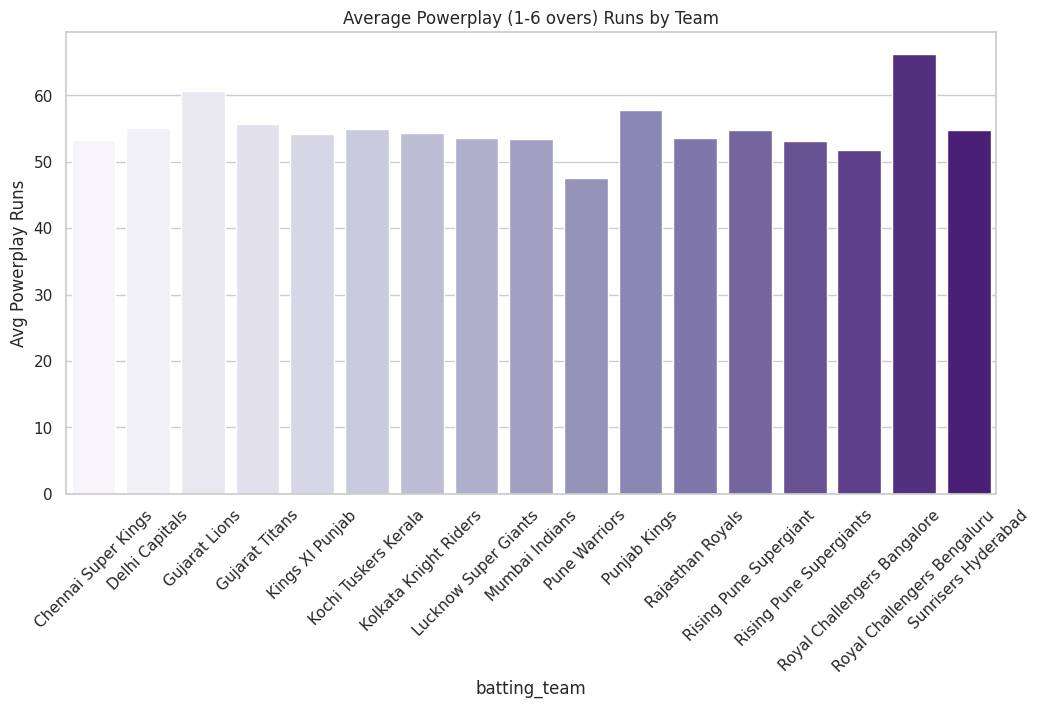

<ipython-input-38-ac76e7735fa7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=death_avg, x='batting_team', y='Avg Death Overs Runs', palette='Greens')


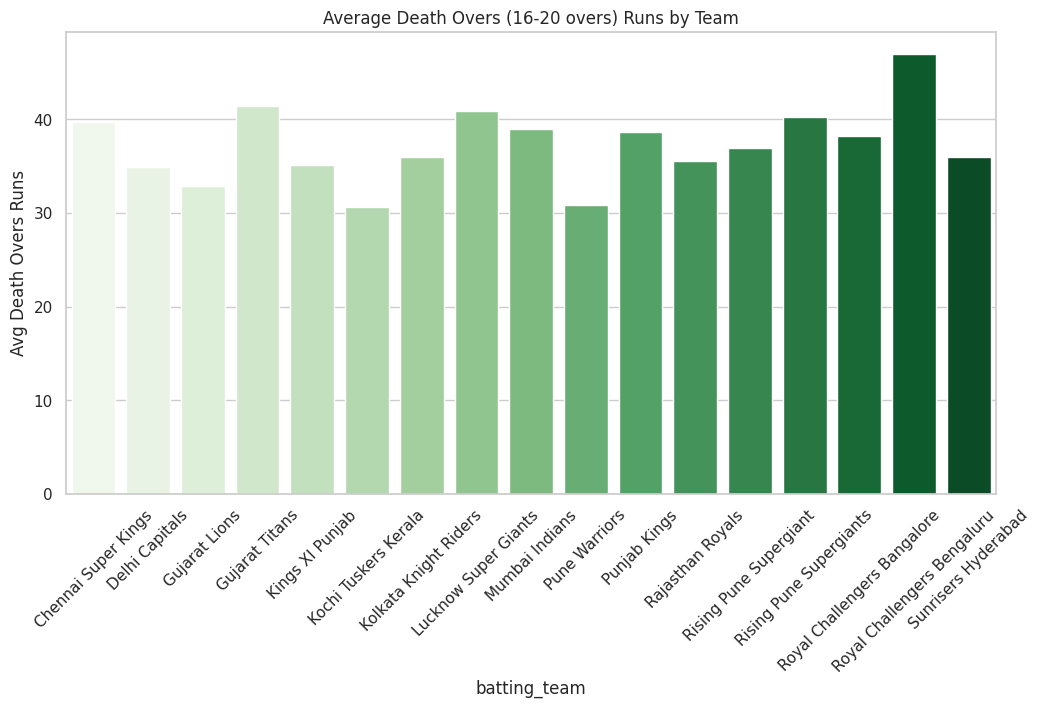

In [ ]:
# Powerplay scores
pp_runs = deliveries[(deliveries['over'] <= 6)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
pp_avg = pp_runs.groupby('batting_team')['total_runs'].mean().reset_index(name='Avg Powerplay Runs')

# Death overs scores
death_runs = deliveries[(deliveries['over'] >= 16)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
death_avg = death_runs.groupby('batting_team')['total_runs'].mean().reset_index(name='Avg Death Overs Runs')

# Plot Powerplay Runs
plt.figure(figsize=(12,6))
sns.barplot(data=pp_avg, x='batting_team', y='Avg Powerplay Runs', palette='Purples')
plt.title("Average Powerplay (1-6 overs) Runs by Team")
plt.xticks(rotation=45)
plt.show()

# Plot Death Overs Runs
plt.figure(figsize=(12,6))
sns.barplot(data=death_avg, x='batting_team', y='Avg Death Overs Runs', palette='Greens')
plt.title("Average Death Overs (16-20 overs) Runs by Team")
plt.xticks(rotation=45)
plt.show()


### **Highest Powerplay Scores by Team**

<ipython-input-43-756707a58607>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=highest_powerplay_scores, x='batting_team', y='total_runs', palette='magma')


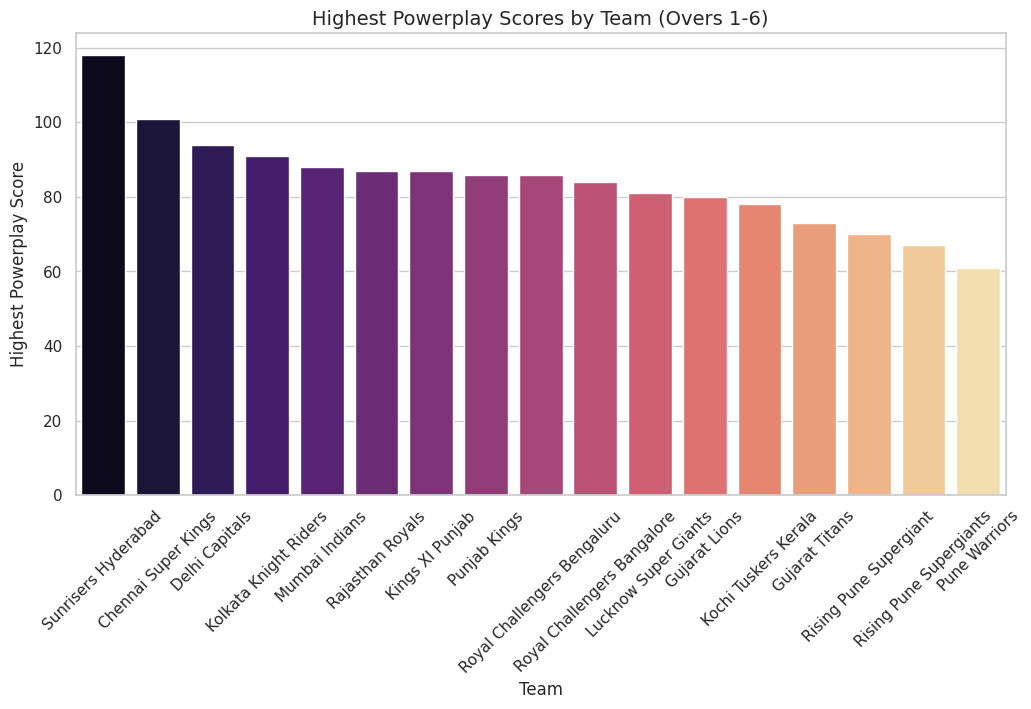

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter Powerplay overs (overs 1 to 6)
powerplay_df = deliveries[(deliveries['over'] >= 1) & (deliveries['over'] <= 6)]

# Total Powerplay runs by match and team
powerplay_runs = powerplay_df.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Highest Powerplay scores by team
highest_powerplay_scores = powerplay_runs.groupby('batting_team')['total_runs'].max().sort_values(ascending=False).reset_index()

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(data=highest_powerplay_scores, x='batting_team', y='total_runs', palette='magma')
plt.title('Highest Powerplay Scores by Team (Overs 1-6)', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Highest Powerplay Score')
plt.xticks(rotation=45)
plt.show()


### **Strike Rate during Powerplays**

<ipython-input-42-e1e3a113b621>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=strike_rate_df, x='batting_team', y='strike_rate', palette='coolwarm')


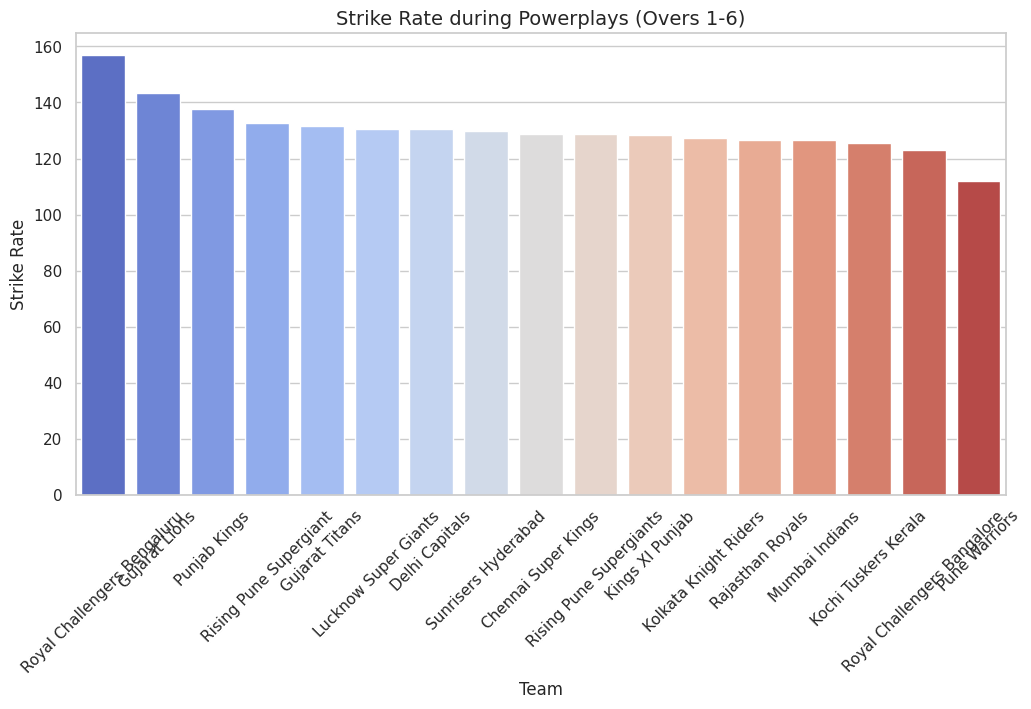

In [ ]:
# Runs per team during Powerplay
pp_runs = powerplay_df.groupby('batting_team')['total_runs'].sum()

# Balls faced by each team during Powerplay
pp_balls = powerplay_df.groupby('batting_team')['ball'].count()

# Strike rate calculation
pp_strike_rate = (pp_runs / pp_balls) * 100

# Convert to DataFrame
strike_rate_df = pp_strike_rate.reset_index().rename(columns={0: 'strike_rate', 'total_runs': 'Strike Rate'})
strike_rate_df.columns = ['batting_team', 'strike_rate']
strike_rate_df = strike_rate_df.sort_values(by='strike_rate', ascending=False)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(data=strike_rate_df, x='batting_team', y='strike_rate', palette='coolwarm')
plt.title('Strike Rate during Powerplays (Overs 1-6)', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.show()


### **Powerplay Wickets Lost**

<ipython-input-44-bc34e86652ea>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pp_wickets, x='batting_team', y='is_wicket', palette='viridis')


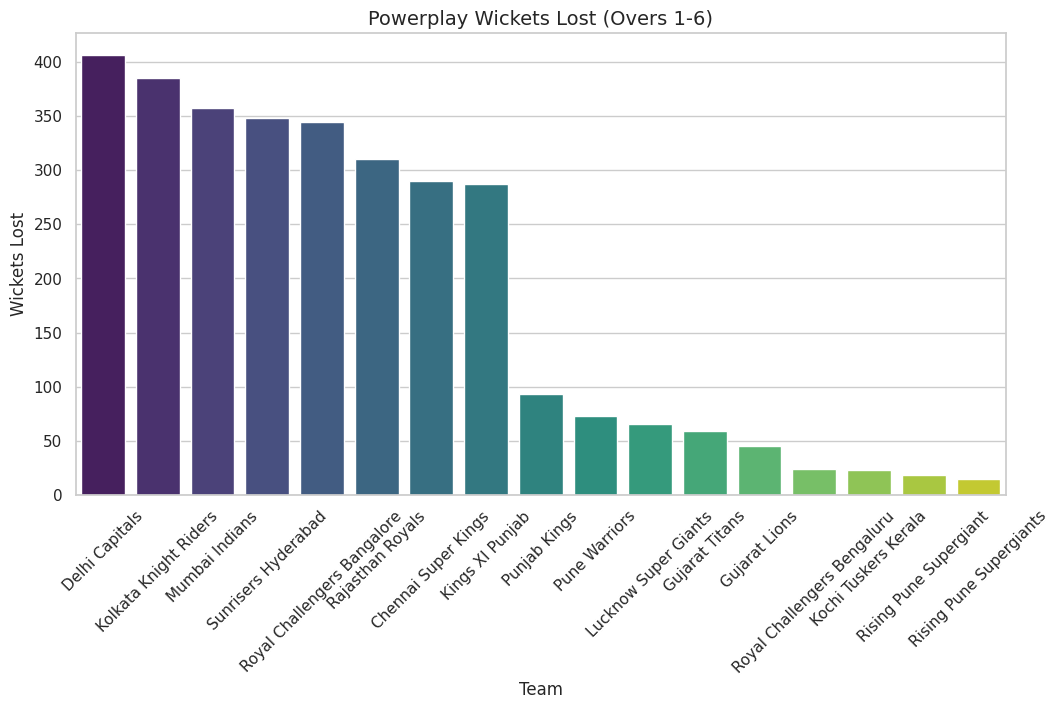

In [ ]:
# Filter deliveries where wickets fell during powerplay
pp_wickets_df = powerplay_df[powerplay_df['is_wicket'] == 1]

# Count wickets per team
pp_wickets = pp_wickets_df.groupby('batting_team')['is_wicket'].sum().sort_values(ascending=False).reset_index()

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(data=pp_wickets, x='batting_team', y='is_wicket', palette='viridis')
plt.title('Powerplay Wickets Lost (Overs 1-6)', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Wickets Lost')
plt.xticks(rotation=45)
plt.show()

### **Combined Powerplay Insights Table**

In [ ]:
# Combine all stats into one table
pp_analysis_summary = highest_powerplay_scores.merge(
    strike_rate_df, on='batting_team'
).merge(
    pp_wickets, on='batting_team'
)

pp_analysis_summary.columns = ['Team', 'Highest PP Score', 'Strike Rate', 'Wickets Lost']
pp_analysis_summary


,Team,Highest PP Score,Strike Rate,Wickets Lost
0,Sunrisers Hyderabad,118,129.945743,348
1,Chennai Super Kings,101,128.940510,290
2,Delhi Capitals,94,130.414353,406
3,Kolkata Knight Riders,91,127.401070,385
4,Mumbai Indians,88,126.583444,357
5,Rajasthan Royals,87,126.660946,310
6,Kings XI Punjab,87,128.297362,287
7,Punjab Kings,86,137.511916,93
8,Royal Challengers Bengaluru,86,156.859206,24
9,Royal Challengers Bangalore,84,122.949713,344


##**Player Performance:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

file_path = "/content/drive/MyDrive/Brain_dead/deliveries.csv"
file_path = "/content/drive/MyDrive/Brain_dead/matches.csv"
print("File exists:", os.path.exists(file_path))


File exists: True


In [ ]:
import pandas as pd

deliveries = pd.read_csv('/content/drive/MyDrive/Brain_dead/deliveries.csv')
matches = pd.read_csv('/content/drive/MyDrive/Brain_dead/matches.csv')



###**Top 20 Run Scorers**

In [ ]:
top_run_scorers = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
top_run_scorers = top_run_scorers.sort_values(by='batsman_runs', ascending=False).head(20)
top_run_scorers


,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


###**Batting Average vs Strike Rate for Top 20 Run Scorers**

<ipython-input-30-491e7b214ec9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  player_stats['batting_average'].replace([float('inf')], 0, inplace=True)


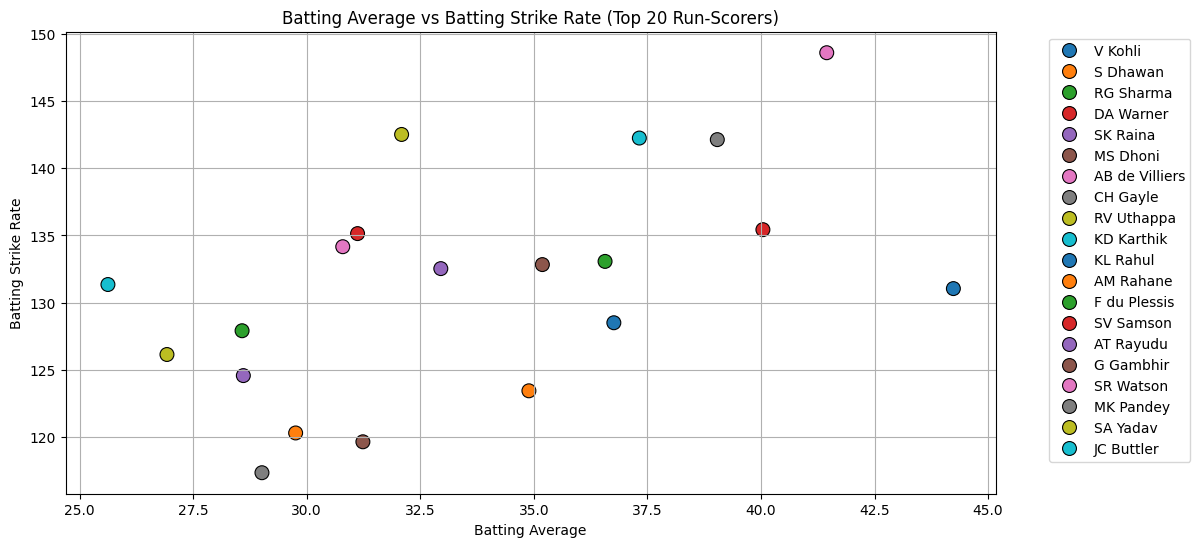

In [ ]:
player_stats = deliveries[deliveries['batter'].isin(top_run_scorers['batter'])]
player_dismissals = player_stats[player_stats['is_wicket'] == 1].groupby('batter').size().reset_index(name='outs')
player_stats = top_run_scorers.merge(player_dismissals, on='batter', how='left').fillna(0)
player_stats['batting_average'] = player_stats['batsman_runs'] / player_stats['outs']
player_stats['batting_average'].replace([float('inf')], 0, inplace=True)
balls_faced = deliveries[deliveries['batter'].isin(top_run_scorers['batter'])].groupby('batter').size().reset_index(name='balls_faced')
player_stats = player_stats.merge(balls_faced, on='batter', how='left')
player_stats['strike_rate'] = (player_stats['batsman_runs'] / player_stats['balls_faced']) * 100
plt.figure(figsize=(12, 6))
sns.scatterplot(data=player_stats, x='batting_average', y='strike_rate', hue='batter', palette='tab10', s=100, edgecolor='black')
plt.xlabel('Batting Average')
plt.ylabel('Batting Strike Rate')
plt.title('Batting Average vs Batting Strike Rate (Top 20 Run-Scorers)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

###**Highest Average and Strike Rate for Players with >50 Matches**

In [ ]:
player_matches = deliveries.groupby('batter')['match_id'].nunique().reset_index()
player_matches = player_matches[player_matches['match_id'] > 50]
avg_sr_stats = player_stats[player_stats['batter'].isin(player_matches['batter'])]
highest_avg = avg_sr_stats.loc[avg_sr_stats['batting_average'].idxmax()]
highest_sr = avg_sr_stats.loc[avg_sr_stats['strike_rate'].idxmax()]
print("Player with Highest Batting Average:\n", highest_avg)
print("\nPlayer with Highest Strike Rate:\n", highest_sr)



Player with Highest Batting Average:
 batter               KL Rahul
batsman_runs             4689
outs                      106
batting_average     44.235849
balls_faced              3578
strike_rate        131.050866
Name: 10, dtype: object

Player with Highest Strike Rate:
 batter             AB de Villiers
batsman_runs                 5181
outs                          125
batting_average            41.448
balls_faced                  3487
strike_rate            148.580442
Name: 6, dtype: object


###**Top Wicket Takers**

In [ ]:
top_wicket_takers = deliveries[deliveries['is_wicket'] == 1].groupby('bowler').size().reset_index(name='wickets')
top_wicket_takers = top_wicket_takers.sort_values(by='wickets', ascending=False).head(10)
top_wicket_takers

,bowler,wickets
449,YS Chahal,213
104,DJ Bravo,207
301,PP Chawla,201
383,SP Narine,200
308,R Ashwin,198
63,B Kumar,195
376,SL Malinga,188
7,A Mishra,183
171,JJ Bumrah,182
323,RA Jadeja,169


###**Top Highest Individual Scores**

In [ ]:
top_scores = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
top_scores = top_scores.sort_values(by='batsman_runs', ascending=False).head(10)
top_scores

,match_id,batter,batsman_runs
5302,598027,CH Gayle,175
2,335982,BB McCullum,158
14108,1304112,Q de Kock,140
7528,829795,AB de Villiers,133
11583,1216510,KL Rahul,132
15383,1370352,Shubman Gill,129
8359,980987,AB de Villiers,129
4687,548372,CH Gayle,128
10149,1136602,RR Pant,128
2237,419137,M Vijay,127


###**Man of the Match Count Analysis**

In [ ]:
man_of_match_count = matches['player_of_match'].value_counts().head(10)
man_of_match_count

,count
player_of_match,
AB de Villiers,25
CH Gayle,22
RG Sharma,19
V Kohli,18
DA Warner,18
MS Dhoni,17
YK Pathan,16
RA Jadeja,16
SR Watson,16


###**K-Means Clustering for Batting Average vs Bowling Economy Rate**

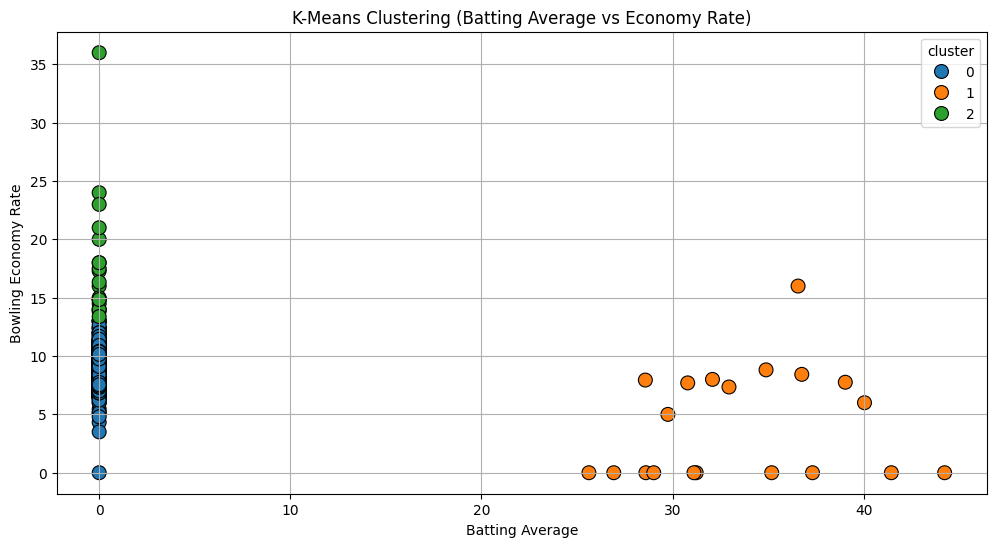

In [ ]:
bowler_stats = deliveries.groupby('bowler')['total_runs'].sum().reset_index()
balls_bowled = deliveries.groupby('bowler').size().reset_index(name='balls_bowled')
bowler_stats = bowler_stats.merge(balls_bowled, on='bowler', how='left')
bowler_stats['economy_rate'] = (bowler_stats['total_runs'] / bowler_stats['balls_bowled']) * 6
combined_stats = player_stats[['batter', 'batting_average']].merge(bowler_stats[['bowler', 'economy_rate']], left_on='batter', right_on='bowler', how='outer').fillna(0)
X = combined_stats[['batting_average', 'economy_rate']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
combined_stats['cluster'] = kmeans.labels_
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_stats, x='batting_average', y='economy_rate', hue='cluster', palette='tab10', s=100, edgecolor='black')
plt.xlabel('Batting Average')
plt.ylabel('Bowling Economy Rate')
plt.title('K-Means Clustering (Batting Average vs Economy Rate)')
plt.grid()
plt.show()

###**Top 10 Batsmen in Each Run Category**

In [ ]:
def get_top_n_scorers(run_value, n=10):
    return deliveries[deliveries['batsman_runs'] == run_value]['batter'].value_counts().head(n)
top_6s = get_top_n_scorers(6)
top_4s = get_top_n_scorers(4)
top_2s = get_top_n_scorers(2)
top_1s = get_top_n_scorers(1)
print("Top 10 Batsmen in Each Run Category:\n")

print("Top 6’s Scorer:")
print(top_6s)

print("\nTop 4’s Scorer:")
print(top_4s)

print("\nTop 2’s Scorer:")
print(top_2s)

print("\nTop 1’s Scorer:")
print(top_1s)


Top 10 Batsmen in Each Run Category:

Top 6’s Scorer:
batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
Name: count, dtype: int64

Top 4’s Scorer:
batter
S Dhawan        768
V Kohli         708
DA Warner       663
RG Sharma       599
SK Raina        506
G Gambhir       492
RV Uthappa      481
AM Rahane       479
KD Karthik      466
F du Plessis    422
Name: count, dtype: int64

Top 2’s Scorer:
batter
V Kohli           445
DA Warner         370
MS Dhoni          340
S Dhawan          299
SK Raina          271
AB de Villiers    268
RG Sharma         263
KD Karthik        258
AM Rahane         257
G Gambhir         249
Name: count, dtype: int64

Top 1’s Scorer:
batter
V Kohli       2591
S Dhawan      2102
RG Sharma     1996
SK Raina      1708
DA Warner     1682
MS Dhoni      1554
AM Rahane     1537
AT Rayudu     14

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

file_path = "/content/drive/MyDrive/brain/deliveries.csv"
file_path = "/content/drive/MyDrive/brain/matches.csv"
print("File exists:", os.path.exists(file_path))


File exists: True


In [ ]:
import pandas as pd

deliveries = pd.read_csv('/content/drive/MyDrive/brain/deliveries.csv')
matches = pd.read_csv('/content/drive/MyDrive/brain/matches.csv')


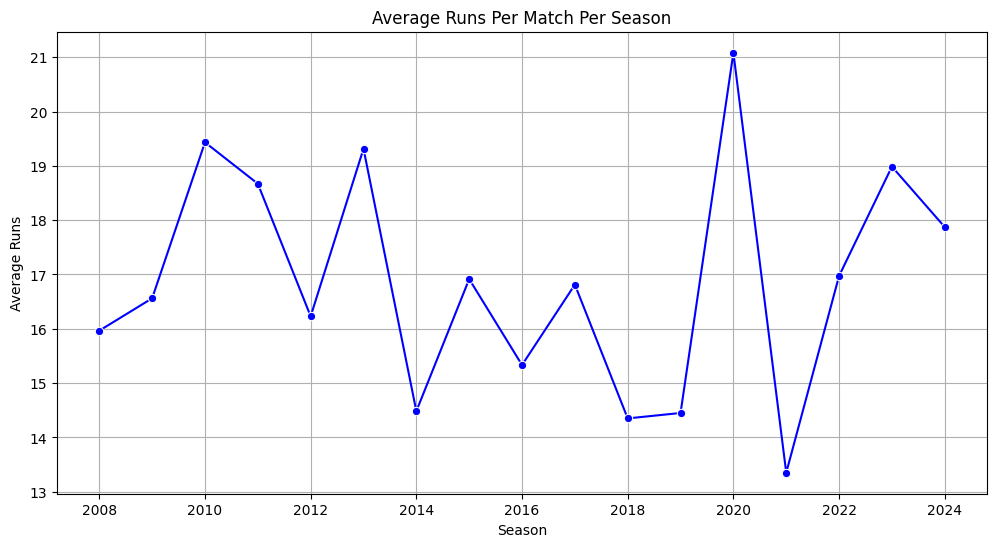

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Extract season from date
matches['date'] = pd.to_datetime(matches['date'])
matches['season'] = matches['date'].dt.year

# Calculate total runs per match
season_runs = matches.groupby('season')['result_margin'].sum()  # result_margin represents the match's run difference
total_matches = matches.groupby('season')['id'].count()

# Compute average runs per match
avg_runs_per_match = season_runs / total_matches

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_runs_per_match.index, y=avg_runs_per_match.values, marker='o', color='b')
plt.title("Average Runs Per Match Per Season")
plt.xlabel("Season")
plt.ylabel("Average Runs")
plt.grid(True)
plt.show()


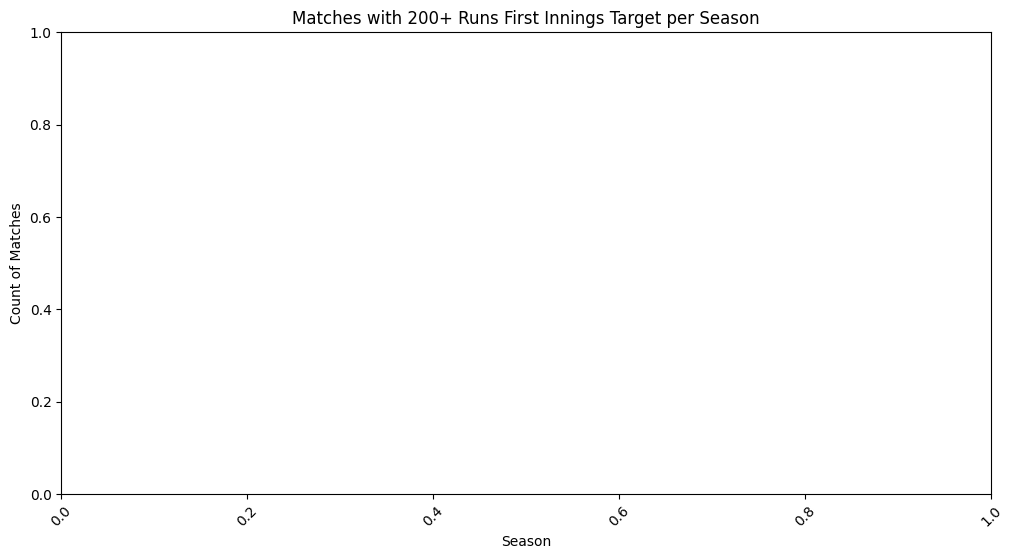

In [ ]:
# Filter matches with 1st innings score >= 200
high_scores = matches[matches['result_margin'] >= 200]

# Count occurrences per season
high_score_counts = high_scores.groupby('season')['id'].count()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=high_score_counts.index, y=high_score_counts.values, palette='coolwarm')
plt.title("Matches with 200+ Runs First Innings Target per Season")
plt.xlabel("Season")
plt.ylabel("Count of Matches")
plt.xticks(rotation=45)
plt.show()


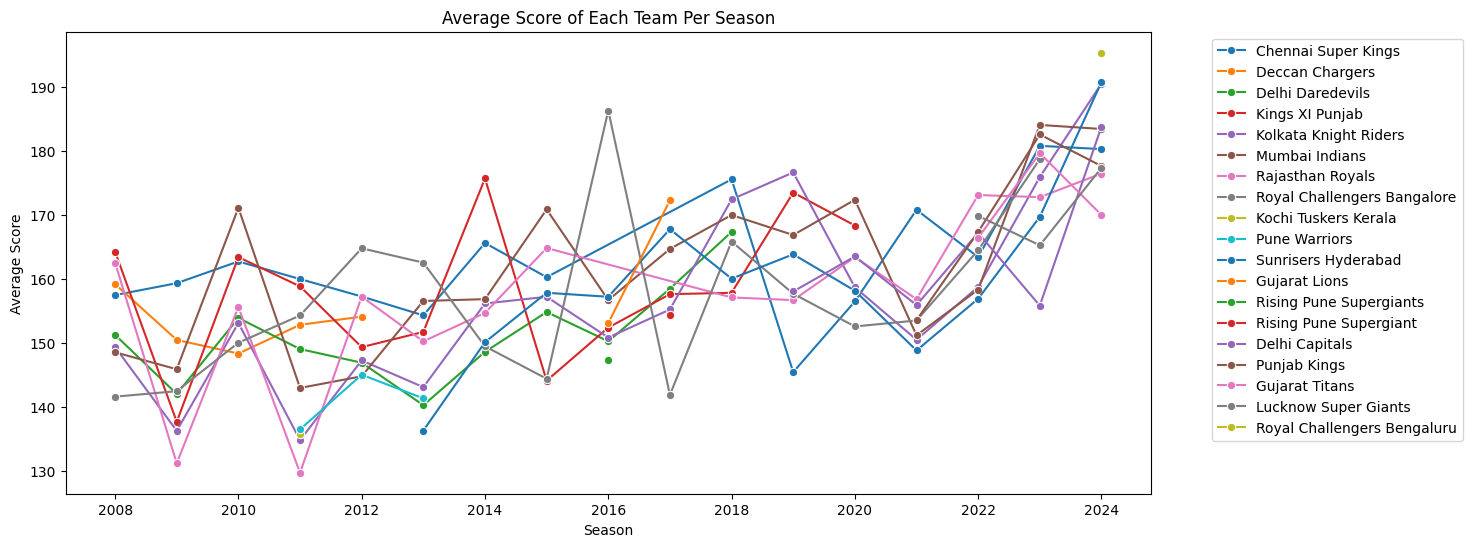

In [ ]:


# Merge deliveries with match season info
deliveries = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

# Calculate total team scores per season
team_season_scores = deliveries.groupby(['season', 'batting_team'])['total_runs'].sum()
team_matches = deliveries.groupby(['season', 'batting_team'])['match_id'].nunique()

# Compute average score per match
avg_team_scores = team_season_scores / team_matches

# Convert to DataFrame
avg_team_scores = avg_team_scores.reset_index()
avg_team_scores.columns = ['season', 'team', 'average_score']

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_team_scores, x='season', y='average_score', hue='team', marker='o', palette='tab10')
plt.title("Average Score of Each Team Per Season")
plt.xlabel("Season")
plt.ylabel("Average Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


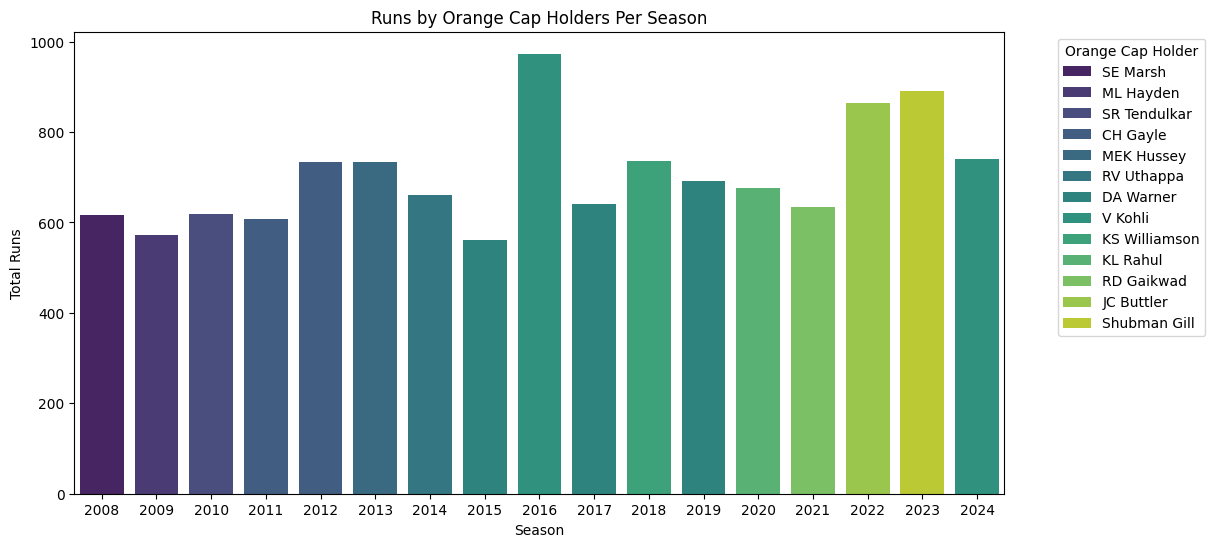

In [ ]:
# Identify the top scorer per season
orange_cap = deliveries.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
orange_cap = orange_cap.sort_values(['season', 'batsman_runs'], ascending=[True, False]).drop_duplicates('season')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=orange_cap, x='season', y='batsman_runs', hue='batter', dodge=False, palette='viridis')
plt.title("Runs by Orange Cap Holders Per Season")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.legend(title="Orange Cap Holder", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


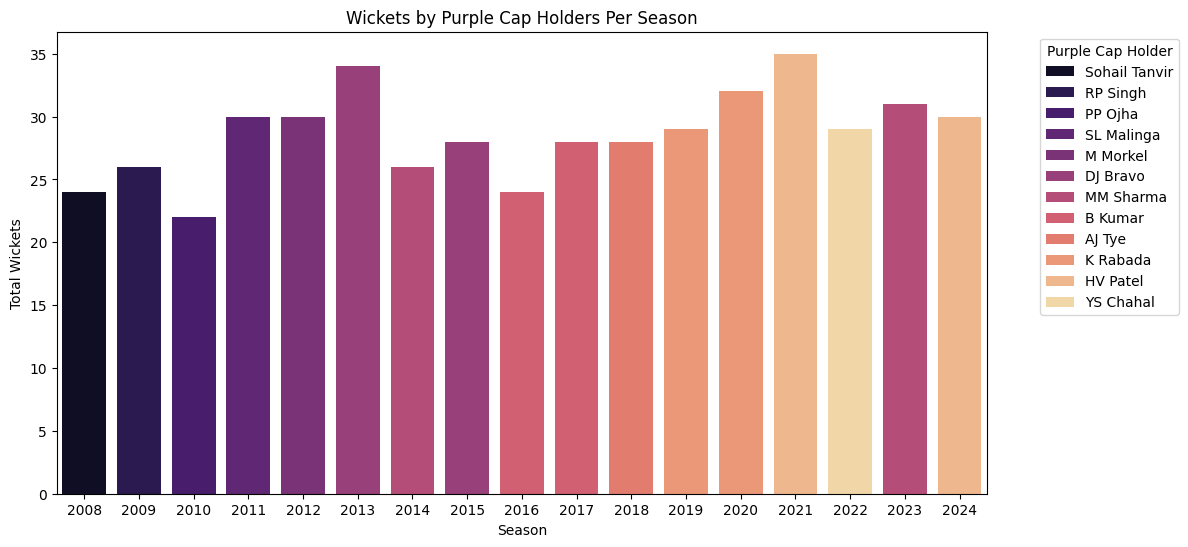

In [ ]:
# Filter only dismissals where a bowler took a wicket
wickets = deliveries[deliveries['is_wicket'] == 1]

# Count wickets per bowler per season
purple_cap = wickets.groupby(['season', 'bowler'])['is_wicket'].sum().reset_index()
purple_cap = purple_cap.sort_values(['season', 'is_wicket'], ascending=[True, False]).drop_duplicates('season')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=purple_cap, x='season', y='is_wicket', hue='bowler', dodge=False, palette='magma')
plt.title("Wickets by Purple Cap Holders Per Season")
plt.xlabel("Season")
plt.ylabel("Total Wickets")
plt.legend(title="Purple Cap Holder", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


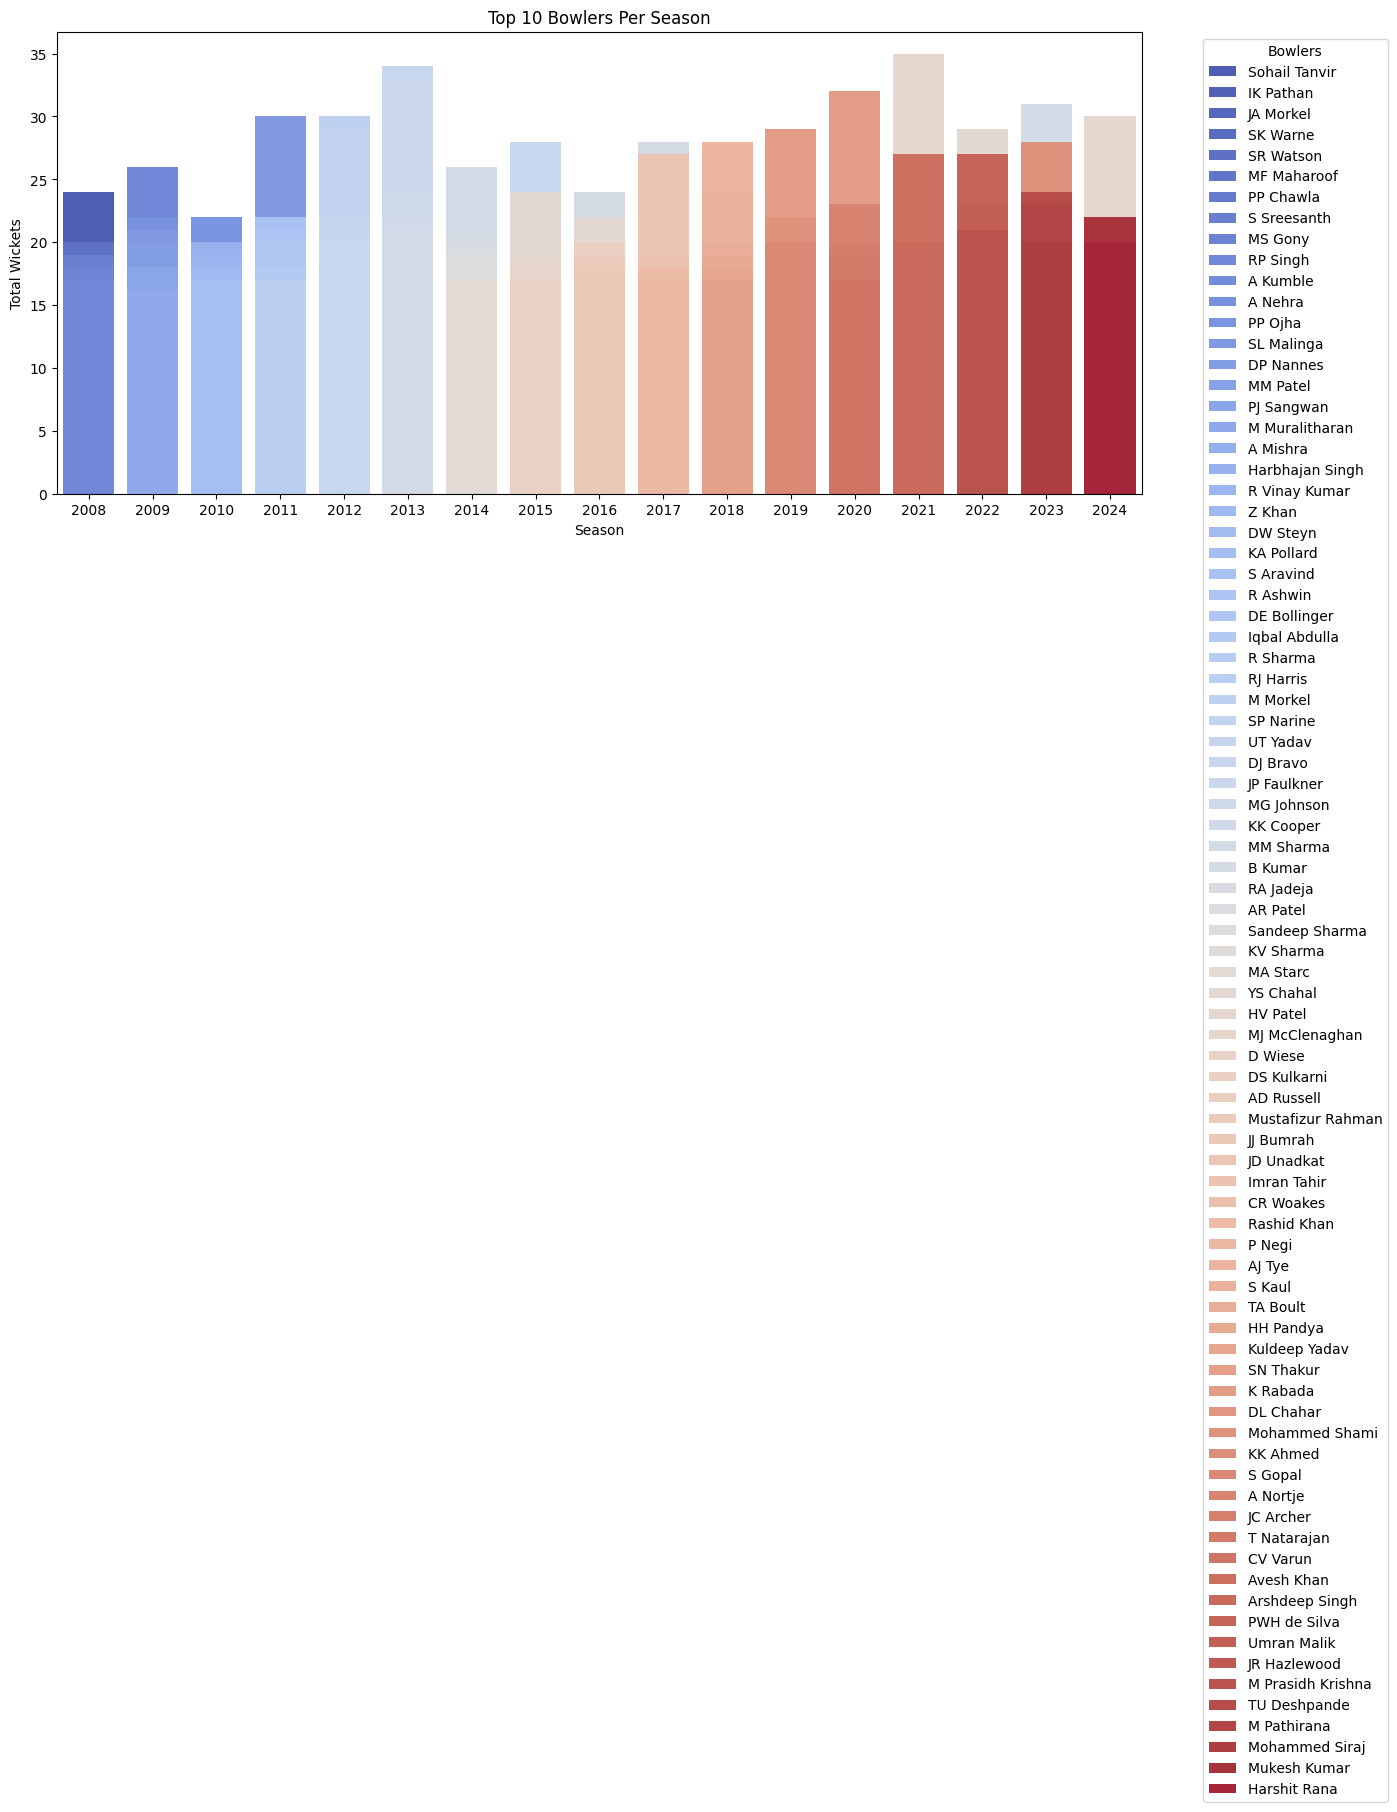

In [ ]:
# Count wickets per bowler per season
top_bowlers = wickets.groupby(['season', 'bowler'])['is_wicket'].sum().reset_index()

# Get top 10 bowlers per season
top_bowlers = top_bowlers.sort_values(['season', 'is_wicket'], ascending=[True, False]).groupby('season').head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_bowlers, x='season', y='is_wicket', hue='bowler', dodge=False, palette='coolwarm')
plt.title("Top 10 Bowlers Per Season")
plt.xlabel("Season")
plt.ylabel("Total Wickets")
plt.legend(title="Bowlers", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

file_path = "/content/drive/MyDrive/Brain Dead/deliveries.csv"
file_path = "/content/drive/MyDrive/Brain Dead/matches.csv"
print("File exists:", os.path.exists(file_path))


File exists: True


In [ ]:
import pandas as pd

deliveries = pd.read_csv('/content/drive/MyDrive/Brain Dead/deliveries.csv')
matches = pd.read_csv('/content/drive/MyDrive/Brain Dead/matches.csv')


In [ ]:
# Selecting key columns and creating a copy to avoid SettingWithCopyWarning
match_features = matches[['season', 'team1', 'team2', 'winner', 'toss_winner', 'venue', 'toss_decision', 'result', 'result_margin']].copy()

# Compute team win percentage
team_wins = matches.groupby('winner')['id'].count()
total_matches = matches.groupby('team1')['id'].count() + matches.groupby('team2')['id'].count()
win_percentage = (team_wins / total_matches).fillna(0) * 100

# Use .loc to avoid warning
match_features.loc[:, 'win_percentage'] = match_features['winner'].map(win_percentage)

# Save feature set
match_features.to_csv("match_features.csv", index=False)



In [ ]:
# Compute batting metrics
batting_stats = deliveries.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    total_balls=('batsman_runs', 'count'),
    total_fours=('batsman_runs', lambda x: (x == 4).sum()),
    total_sixes=('batsman_runs', lambda x: (x == 6).sum()),
    total_matches=('match_id', 'nunique')
)

batting_stats['batting_avg'] = batting_stats['total_runs'] / batting_stats['total_matches']
batting_stats['strike_rate'] = (batting_stats['total_runs'] / batting_stats['total_balls']) * 100

# Compute bowling metrics
bowling_stats = deliveries.groupby('bowler').agg(
    total_wickets=('is_wicket', 'sum'),
    total_runs_conceded=('total_runs', 'sum'),
    total_overs=('over', 'count')
)

bowling_stats['economy_rate'] = bowling_stats['total_runs_conceded'] / (bowling_stats['total_overs'] / 6)

# Save extracted insights
batting_stats.to_csv("batting_features.csv")
bowling_stats.to_csv("bowling_features.csv")


In [ ]:
!ls


batting_features.csv  bowling_features.csv  drive  match_features.csv  sample_data


In [ ]:
from google.colab import files
files.download("batting_features.csv")
files.download("bowling_features.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost joblib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
import joblib

# Display plots inline
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

file_path = "/content/drive/MyDrive/Brain_dead/deliveries.csv"
file_path = "/content/drive/MyDrive/Brain_dead/matches.csv"
print("File exists:", os.path.exists(file_path))


File exists: True


In [ ]:
import pandas as pd

deliveries = pd.read_csv('/content/drive/MyDrive/Brain_dead/deliveries.csv')
matches = pd.read_csv('/content/drive/MyDrive/Brain_dead/matches.csv')



In [ ]:



# Display first few rows
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,4/18/2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,4/19/2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,4/19/2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,4/20/2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,4/20/2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
# Check for missing values
print(matches.isnull().sum())

# Drop unnecessary columns
matches = matches[['team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]

# Convert categorical variables to numerical
matches = pd.get_dummies(matches, columns=['team1', 'team2', 'toss_winner', 'toss_decision'], drop_first=True)

# Display cleaned data
matches.head()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


,winner,team1_Deccan Chargers,team1_Delhi Capitals,team1_Delhi Daredevils,team1_Gujarat Lions,team1_Gujarat Titans,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Lucknow Super Giants,...,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Punjab Kings,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Royal Challengers Bengaluru,toss_winner_Sunrisers Hyderabad,toss_decision_field
0,Kolkata Knight Riders,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,Chennai Super Kings,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Delhi Daredevils,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,Royal Challengers Bangalore,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,Kolkata Knight Riders,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


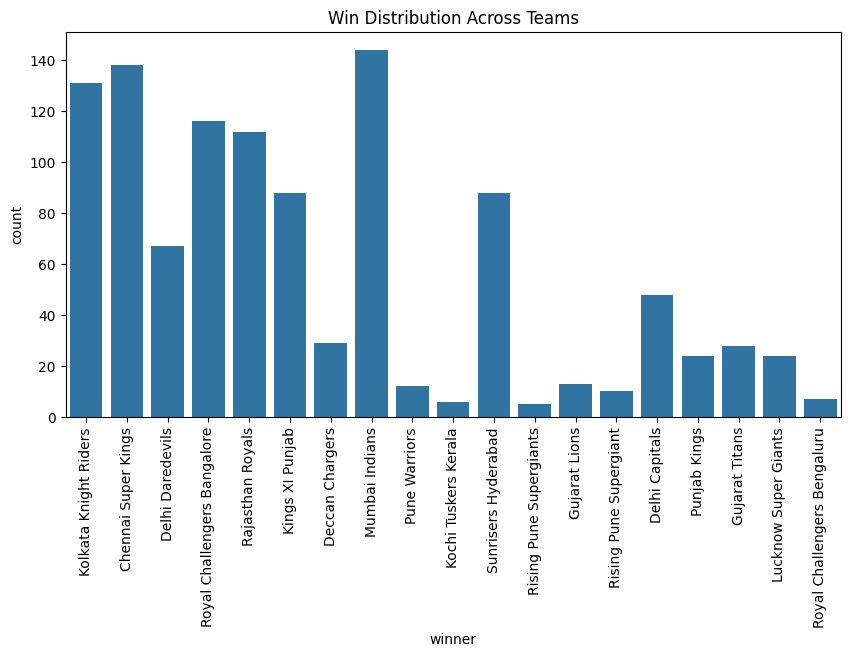

In [ ]:
# Plot team win distribution
plt.figure(figsize=(10,5))
sns.countplot(x=matches['winner'])
plt.xticks(rotation=90)
plt.title("Win Distribution Across Teams")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset (Ensure 'matches' is a DataFrame)
# matches = pd.read_csv("your_dataset.csv")  # Uncomment if loading from a file

# Define features (X) and target variable (y)
X = matches.drop(columns=['winner'])
y = matches['winner']

# Encode categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Encode categorical features if any
X = pd.get_dummies(X)  # One-hot encoding for categorical features

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42)

# Ensemble model using Voting Classifier
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft')

# Train the model
ensemble_model.fit(X_train, y_train)

# Print accuracy
print("Model Accuracy:", ensemble_model.score(X_test, y_test))


Model Accuracy: 0.4794520547945205
